# 5.5.4 Challenge: What test to use
Using selected questions from the 2012 and 2014 editions of the European Social Survey, address the following questions. Keep track of your code and results in a Jupyter notebook or other source that you can share with your mentor. For each question, explain why you chose the approach you did.

Here is the data file. And here is the codebook, with information about the variable coding and content.

In this dataset, the same participants answered questions in 2012 and again 2014.

1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.
2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.
3. Who reported watching more TV in 2012, men or women?
4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?
5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?
6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('ESSdata_Thinkful.csv')

In [3]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8594 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8594 non-null object
idno       8594 non-null float64
year       8594 non-null int64
tvtot      8586 non-null float64
ppltrst    8580 non-null float64
pplfair    8555 non-null float64
pplhlp     8569 non-null float64
happy      8563 non-null float64
sclmeet    8579 non-null float64
sclact     8500 non-null float64
gndr       8584 non-null float64
agea       8355 non-null float64
partner    8577 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 872.9+ KB


In [5]:
df = df.dropna()

In [18]:
df.shape

(8147, 13)

#### 1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

In [12]:
 countries = df['cntry'].unique()

Text(0.5,1,'Most People Can be Trusted')

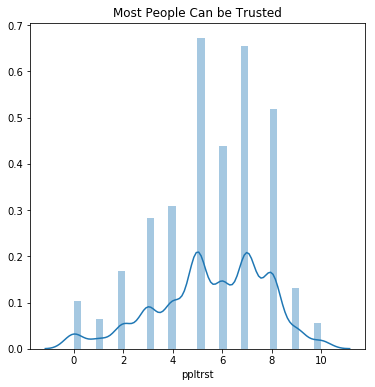

In [11]:
plt.figure(figsize=(6,6))

sns.distplot(df['ppltrst'])
plt.title('Most People Can be Trusted')

In [17]:
for country in countries:
    df_by_c = df[df['cntry'] == country]
    t_stat, pvalue = stats.ttest_ind(df_by_c['ppltrst'][df_by_c['year']== 6], df_by_c['ppltrst'][df_by_c['year']== 7])
    print(country, 't-statistic: {}, pvalue: {}'.format(t_stat, pvalue))

CH t-statistic: -0.7156974792217816, pvalue: 0.4742916002909491
CZ t-statistic: 0.34075433231518504, pvalue: 0.7333479315909976
DE t-statistic: -0.3466213170125284, pvalue: 0.7317764273785732
ES t-statistic: 2.1000674443244907, pvalue: 0.03583204193521363
NO t-statistic: 0.5119224181145228, pvalue: 0.6087850218131978
SE t-statistic: -2.0268698056063146, pvalue: 0.0428293634522298


Spain seemed to have a decrease in trust, while Sweeden had an increase in trust. The other countries did not have a significant change.

#### 2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.

Text(0.5,1,'happy')

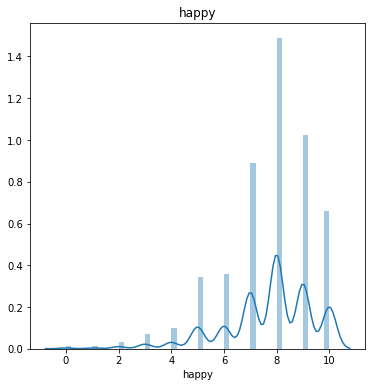

In [19]:
plt.figure(figsize=(6,6))

sns.distplot(df['happy'])
plt.title('happy')

In [24]:
for country in countries:
    df_by_c = df[df['cntry'] == country]
    stat = stats.kruskal(df_by_c['happy'][df_by_c['year']== 6], df_by_c['happy'][df_by_c['year']== 7])
    print(country, stat)

CH KruskalResult(statistic=0.7393607796289999, pvalue=0.3898657201494511)
CZ KruskalResult(statistic=0.7888702806828175, pvalue=0.37444194652901)
DE KruskalResult(statistic=0.7954545454545382, pvalue=0.3724558699813717)
ES KruskalResult(statistic=2.9615793608595036, pvalue=0.08526461865591295)
NO KruskalResult(statistic=17.78863118177249, pvalue=2.4685385809958533e-05)
SE KruskalResult(statistic=0.10011450993142058, pvalue=0.7516922609168144)


Norway seems to be less happy from 2012 t0 2014. Most did not change.

#### 3. Who reported watching more TV in 2012, men or women?

In [27]:
df_2012 = df[df['year'] == 6]

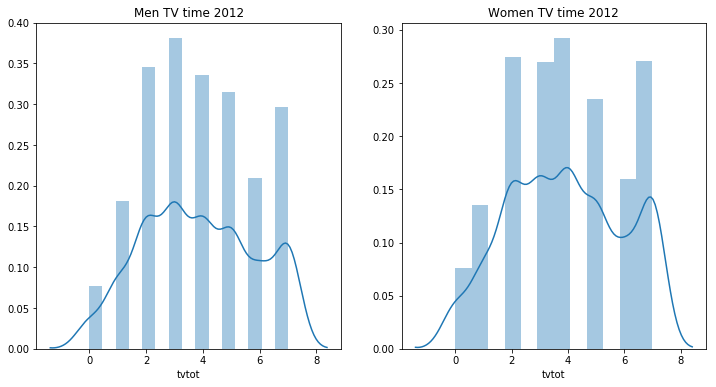

In [28]:
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
sns.distplot(df_2012['tvtot'][df_2012['gndr'] == 1])
plt.title('Men TV time 2012')

plt.subplot(1, 2, 2)
sns.distplot(df_2012['tvtot'][df_2012['gndr'] == 2])
plt.title('Women TV time 2012')

plt.show()

In [29]:
stats.kruskal(df_2012['tvtot'][df_2012['gndr'] == 1], df_2012['tvtot'][df_2012['gndr'] == 2])

KruskalResult(statistic=0.6145695087428265, pvalue=0.4330724786171142)

For 2012, there is not a significant difference reported between genders in TV watching.

#### 4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

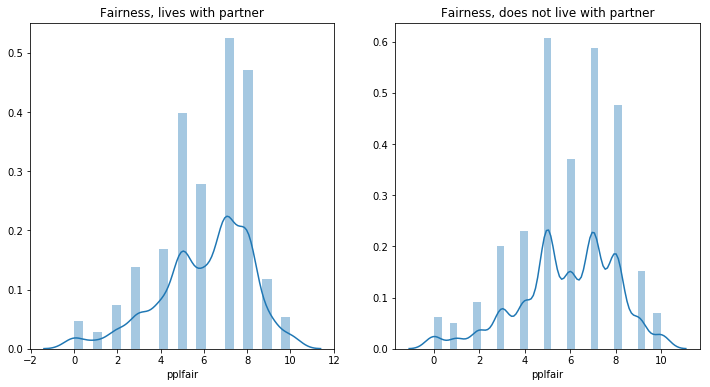

In [30]:
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
sns.distplot(df_2012['pplfair'][df_2012['partner'] == 1])
plt.title('Fairness, lives with partner')

plt.subplot(1, 2, 2)
sns.distplot(df_2012['pplfair'][df_2012['partner'] == 2])
plt.title('Fairness, does not live with partner')

plt.show()

In [32]:
stats.ttest_ind(df_2012['pplfair'][df_2012['partner'] == 1], df_2012['pplfair'][df_2012['partner'] == 2])

Ttest_indResult(statistic=3.0430439318464235, pvalue=0.002356936676939248)

People who live with a partner were more likely to believe people were fair.

#### 5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [33]:
df_2014 = df[df['year'] == 7]

spain = df_2014.loc[df_2014['cntry'] == 'ES']
czech = df_2014.loc[df_2014['cntry'] == 'CZ']
germany = df_2014.loc[df_2014['cntry'] == 'DE']

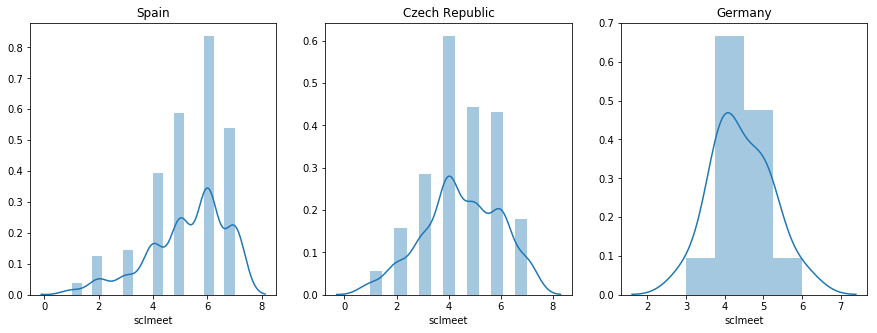

In [38]:
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
sns.distplot(spain['sclmeet'])
plt.title('Spain')

plt.subplot(1, 3, 2)
sns.distplot(czech['sclmeet'])
plt.title('Czech Republic')

plt.subplot(1, 3, 3)
sns.distplot(germany['sclmeet'])
plt.title('Germany')

plt.show()

In [41]:
print(germany['sclmeet'].mean())
print(spain['sclmeet'].mean())
print(czech['sclmeet'].mean())

4.428571428571429
5.263668430335097
4.4950495049504955


In [42]:
stats.kruskal(germany['sclmeet'], spain['sclmeet'], czech['sclmeet'])

KruskalResult(statistic=120.72958033262947, pvalue=6.0800161031835895e-27)

In [43]:
stats.kruskal(germany['sclmeet'], czech['sclmeet'])

KruskalResult(statistic=0.0981201650958121, pvalue=0.754097278879884)

In [44]:
stats.kruskal(germany['sclmeet'], spain['sclmeet'])

KruskalResult(statistic=8.439626051020797, pvalue=0.0036713173582643595)

In [45]:
stats.kruskal(spain['sclmeet'], czech['sclmeet'])

KruskalResult(statistic=116.22824793359308, pvalue=4.236248669944652e-27)

Spain seems to socalize a lot more than Germany and Czech Republic. There is not a significant difference between Germany and Czech Republic.

#### 6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [46]:
print(germany['sclact'].mean())
print(spain['sclact'].mean())
print(czech['sclact'].mean())

2.7142857142857144
2.631393298059965
2.7293729372937294


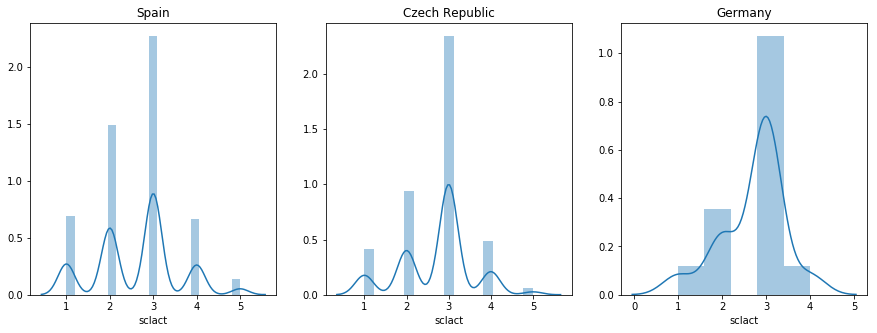

In [47]:
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
sns.distplot(spain['sclact'])
plt.title('Spain')

plt.subplot(1, 3, 2)
sns.distplot(czech['sclact'])
plt.title('Czech Republic')

plt.subplot(1, 3, 3)
sns.distplot(germany['sclact'])
plt.title('Germany')

plt.show()

In [48]:
stats.f_oneway(germany['sclact'], spain['sclact'], czech['sclact'])

F_onewayResult(statistic=2.289634926758924, pvalue=0.10160666210237275)

With a P-value of .10, the countries are not likely to be significantly different. 